## Moving Averages Model (MA)

#### AUTHOR: AVINASH VINAYAK BAGUL

###### IMPORTING SUPPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
import time

##### READING THE DATASET

In [2]:
df1 = pd.read_csv('iqr_benchmark.csv', parse_dates=['Time_stamp'], index_col=['Time_stamp'])
df1

,boxName,PM 2.5,temp,pressure,humidity,wind_speed,Time of Day,Peak/NoPeak,Day,Week Day,Weather,Weather Description,label
Time_stamp,,,,,,,,,,,,,
2018-12-31 18:30:12,iGude,18.20,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:32:41,iGude,19.27,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:35:11,iGude,18.57,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:37:41,iGude,17.85,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
2018-12-31 18:40:11,iGude,25.95,7.71,1032,100,3.09,Evening_Hours,Peak,Monday,Workday,Clouds,broken clouds,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-28 18:09:43,Alt Bornheim Feinstaub,3.10,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:14:44,Alt Bornheim Feinstaub,2.35,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal
2020-02-28 18:19:45,Alt Bornheim Feinstaub,3.20,6.00,1013,56,3.60,Evening_Hours,Peak,Friday,Workday,Clear,sky is clear,normal


##### UNIVARIATE DATA FOR MOVING AVERAGES - FOR 1 SENSE-BOX (BERNEM)

In [3]:
df = df1.drop(df1.iloc[:,2:], axis = 1)
df = df[df['boxName'] == 'Bernem']
df = df.drop(df.iloc[:,0:1], axis = 1 )
df

,PM 2.5
Time_stamp,
2018-12-31 18:30:53,139.63
2018-12-31 18:35:01,136.43
2018-12-31 18:39:09,112.67
2018-12-31 18:43:17,46.87
2018-12-31 18:47:24,38.30
...,...
2020-02-28 18:11:12,3.93
2020-02-28 18:14:31,4.33
2020-02-28 18:21:01,3.93


##### BENCHMARK DATASET FOR 1 SENSE-BOX (BERNEM)

In [4]:
bernem = df1[df1['boxName']=='Bernem']
bernem = bernem.iloc[2:,:]
bernem = bernem.drop(bernem.iloc[:,0:1], axis = 1)
bernem_anml = bernem[bernem['label']=='abnormal']
print('anomalies in bernem ', len(bernem_anml))

anomalies in bernem  8805


##### IMPLEMENTING ALGORITHM 

Streaming output truncated to the last 5000 lines.
predicted=2.285000, expected=2.200000
predicted=2.250000, expected=2.400000
predicted=2.300000, expected=2.270000
predicted=2.335000, expected=2.100000
predicted=2.185000, expected=2.630000
predicted=2.365000, expected=1.900000
predicted=2.265000, expected=2.300000
predicted=2.100000, expected=3.000000
predicted=2.650000, expected=2.030000
predicted=2.515000, expected=2.200000
predicted=2.115000, expected=1.970000
predicted=2.085000, expected=1.630000
predicted=1.800000, expected=2.600000
predicted=2.115000, expected=1.830000
predicted=2.215000, expected=1.970000
predicted=1.900000, expected=3.870000
predicted=2.920000, expected=2.570000
predicted=3.220000, expected=1.800000
predicted=2.185000, expected=2.230000
predicted=2.015000, expected=2.230000
predicted=2.230000, expected=2.230000
predicted=2.230000, expected=2.100000
predicted=2.165000, expected=2.600000
predicted=2.350000, expected=2.100000
predicted=2.350000, expected=2.270000

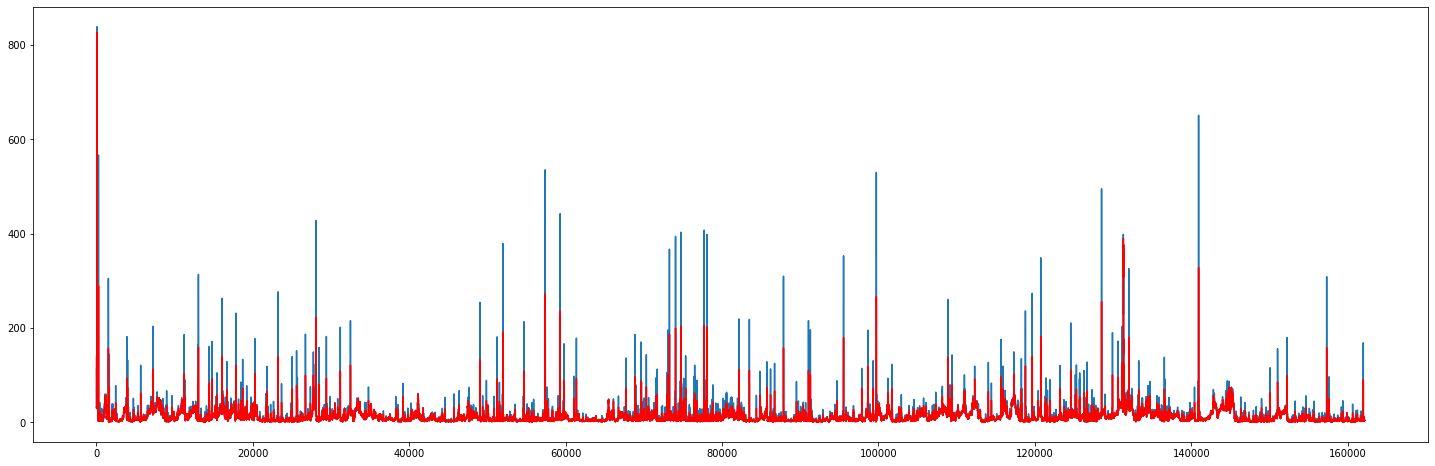

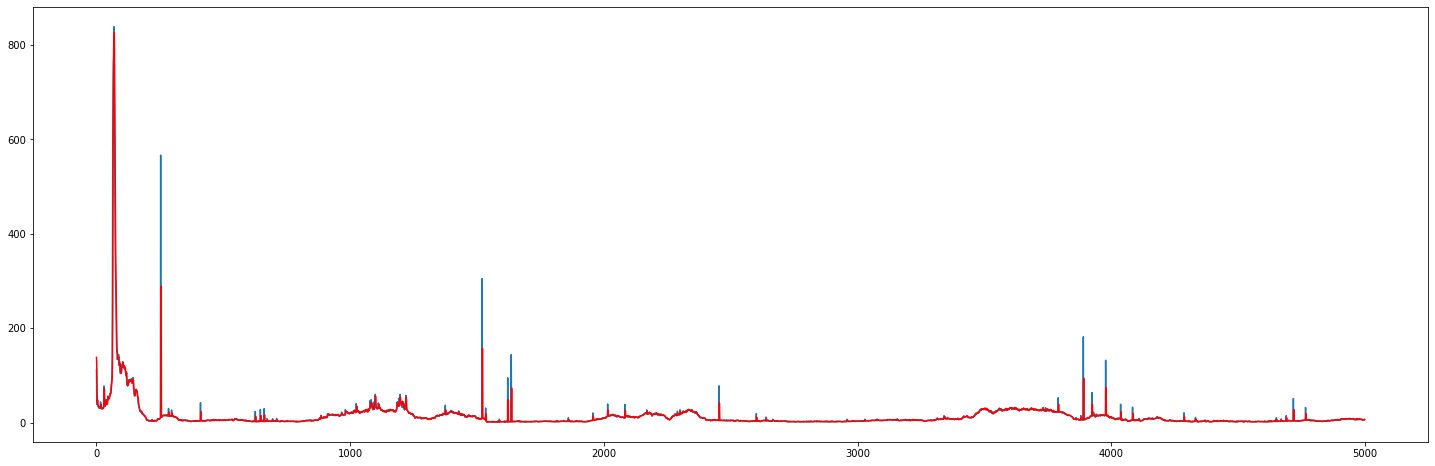

In [20]:
start = time.time()
X = df.values
window = 2
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %f'% rmse)
print("--- %s seconds ---" % (time.time() - start))
# plot
plt.figure(figsize=(25,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
# zoom plot
plt.figure(figsize=(25,8))
plt.plot(test[0:5000])
plt.plot(predictions[0:5000], color='red')
plt.show()

##### ADDING OBTAINED EXPECTED VALUES TO THE DATAFRAME

In [21]:
dframe = df.iloc[2:,:]
dframe['prediction'] = predictions
dframe

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PM 2.5,prediction
Time_stamp,,
2018-12-31 18:39:09,112.67,138.030
2018-12-31 18:43:17,46.87,124.550
2018-12-31 18:47:24,38.30,79.770
2018-12-31 18:51:32,56.53,42.585
2018-12-31 18:55:52,37.60,47.415
...,...,...
2020-02-28 18:11:12,3.93,3.680
2020-02-28 18:14:31,4.33,3.880
2020-02-28 18:21:01,3.93,4.130


##### SEPARATING INSTANCES WHERE ACTUAL_VALUE > EXPECTED VALUE

In [22]:
anomalous = []
for i in range(0,len(X)-2):
    temp_list = []
    ind = dframe.index[i]
    val = dframe.values[i]
    
    if val[0] > val[1] :
     
        temp_list.append(ind)
        temp_list.append(val[0])
        temp_list.append(val[1])
        anomalous.append(temp_list)

In [23]:
suspects = pd.DataFrame(anomalous,columns=['Time_stamp','actual','expected'])
suspects = suspects.set_index(suspects.iloc[:,0])
suspects = suspects.drop(suspects.iloc[:,0:1], axis = 1)
suspects

,actual,expected
Time_stamp,,
2018-12-31 18:51:32,56.53,42.585
2018-12-31 19:13:03,35.00,34.185
2018-12-31 19:25:26,32.57,31.150
2018-12-31 19:41:58,33.47,30.835
2018-12-31 19:46:05,43.67,32.035
...,...,...
2020-02-28 18:00:41,4.17,3.800
2020-02-28 18:08:32,3.83,3.515
2020-02-28 18:11:12,3.93,3.680


##### Z-SCORE METHOD TO DETECT OUTLIERS

In [24]:
def detect_outlier(data):
    #print(type(data))
    outliers=[]
    threshold=2
    data_1 = data
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
      
      
    for y in data_1:
        if std_1 == 0:
            z_score = (y-mean_1)/1
        
        else:
            z_score = (y - mean_1)/std_1 
        
        
        
        if np.abs(z_score) > threshold:
            outliers.append('abnormal')
        else:
            outliers.append('normal')
    
    
    #data['labels'] == outliers
    
    return outliers

IQR method


In [10]:
def get_label(data):
  ### outliers with 25 and 75 quartile method:

    sorted_val = sorted(data)

    q1, q3 = np.percentile(sorted_val,[25,75])
    qr = q3-q1

    lower_bound = q1 - (1.5 * qr)
    upper_bound = q3 + (1.5 * qr)

    otl = 0

    for i in sorted_val:
        if i > upper_bound:
            otl +=1

    ### taking upper bound from quartilemethod as our upper limit and everyting beyond that point is anomalous behaviour in that period.

    label_dict = []
    #x = data['PM 2.5'].values
    x = data
    #print(x)

    for i in x :
        if i > upper_bound or i < lower_bound:
            label_dict.append('abnormal')
        else:
            label_dict.append('normal')

    #data['label'] = label_dict
  
    return label_dict

In [25]:
#anomaly_list = detect_outlier(suspects['actual'])
anomaly_list = get_label(suspects['actual'])
suspects['label'] = anomaly_list
suspects.groupby('label').count()

,actual,expected
label,,
abnormal,4727,4727
normal,72703,72703


In [26]:
suspects

,actual,expected,label
Time_stamp,,,
2018-12-31 18:51:32,56.53,42.585,abnormal
2018-12-31 19:13:03,35.00,34.185,abnormal
2018-12-31 19:25:26,32.57,31.150,abnormal
2018-12-31 19:41:58,33.47,30.835,abnormal
2018-12-31 19:46:05,43.67,32.035,abnormal
...,...,...,...
2020-02-28 18:00:41,4.17,3.800,normal
2020-02-28 18:08:32,3.83,3.515,normal
2020-02-28 18:11:12,3.93,3.680,normal


In [27]:
result = pd.merge(dframe, suspects, left_on='Time_stamp', right_index=True,how='left', sort=False);

In [28]:
result

,PM 2.5,prediction,actual,expected,label
Time_stamp,,,,,
2018-12-31 18:39:09,112.67,138.030,NaN,NaN,NaN
2018-12-31 18:43:17,46.87,124.550,NaN,NaN,NaN
2018-12-31 18:47:24,38.30,79.770,NaN,NaN,NaN
2018-12-31 18:51:32,56.53,42.585,56.53,42.585,abnormal
2018-12-31 18:55:52,37.60,47.415,NaN,NaN,NaN
...,...,...,...,...,...
2020-02-28 18:11:12,3.93,3.680,3.93,3.680,normal
2020-02-28 18:14:31,4.33,3.880,4.33,3.880,normal
2020-02-28 18:21:01,3.93,4.130,NaN,NaN,NaN


In [29]:
result = result.drop(result.iloc[:,2:4], axis = 1)
result["label"].fillna("normal", inplace = True) 
result

,PM 2.5,prediction,label
Time_stamp,,,
2018-12-31 18:39:09,112.67,138.030,normal
2018-12-31 18:43:17,46.87,124.550,normal
2018-12-31 18:47:24,38.30,79.770,normal
2018-12-31 18:51:32,56.53,42.585,abnormal
2018-12-31 18:55:52,37.60,47.415,normal
...,...,...,...
2020-02-28 18:11:12,3.93,3.680,normal
2020-02-28 18:14:31,4.33,3.880,normal
2020-02-28 18:21:01,3.93,4.130,normal


In [30]:
result.groupby('label').count()

,PM 2.5,prediction
label,,
abnormal,4727,4727
normal,157444,157444


#### COMPARING RESULTS (ACCURACY, PRECISION, RECALL, F1-SCORE)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

obt_label = result['label']
gold_label = bernem['label']
testy = obt_label
yhat_classes = gold_label

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes, pos_label = 'abnormal')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes, pos_label = 'abnormal')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes, pos_label = 'abnormal')
print('F1 score: %f' % f1)

Accuracy: 0.944959
Precision: 0.261556
Recall: 0.487201
F1 score: 0.340378
